In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
BASE_RESULTS_DIR = '/media/big-ssd/results-P3856'

In [3]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/P3856_YHE211_1_Slot1-1_1_5104-cs-false-fmdw-true-2021-08-29-15-33-27/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [4]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/media/big-ssd/results-P3856/P3856_YHE211_1_Slot1-1_1_5104-cs-false-fmdw-true-2021-08-29-15-33-27/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.feather'

In [5]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [6]:
# load the identifications that had saturated points in the mono
identifications_with_fmdw_df = pd.read_feather(IDENTIFICATIONS_WITH_FMDW_FILE)
identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

#### identifications without mass defect window filtering

In [7]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/P3856_YHE211_1_Slot1-1_1_5104-cs-false-fmdw-false-2021-08-29-12-44-52/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [8]:
# load the identifications that had saturated points in the mono
identifications_without_fmdw_df = pd.read_feather(IDENTIFICATIONS_WITHOUT_FMDW_FILE)
identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [9]:
selected_feature_id = identifications_without_fmdw_df.sample(n=1).iloc[0].feature_id

In [10]:
selected_feature_without_fmdw = identifications_without_fmdw_df[(identifications_without_fmdw_df.feature_id == selected_feature_id)]
selected_feature_without_fmdw

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
14037,19264,1062.526123,1062.59375,186.0,131,200,1767.943848,1764.766968,1770.588989,4368,...,0.000427,0.014525,20743.2,KEEVPEPVAGPIVESSVTEK,sp|P38845|CRP1_YEAST,KS,2123.097224,2123.0997,-1.166337,-0.002476


In [11]:
len(json.loads(selected_feature_without_fmdw.iloc[0].fragment_ions_l))

101

In [12]:
selected_feature_with_fmdw = identifications_with_fmdw_df[(identifications_with_fmdw_df.feature_id == selected_feature_id)]
selected_feature_with_fmdw

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
14066,19264,1062.526123,1062.59375,186.0,131,200,1767.943848,1764.766968,1770.588989,4368,...,0.000292,0.010918,20715.1,KEEVPEPVAGPIVESSVTEK,sp|P38845|CRP1_YEAST,KS,2123.097477,2123.0997,-1.047082,-0.002223


In [13]:
len(json.loads(selected_feature_with_fmdw.iloc[0].fragment_ions_l))

57

#### unique identifications found with and without mass defect window filtering

In [14]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].mean()
    q_value = group_df['percolator q-value'].mean()
    if percolator_score > 0:
        sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [15]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].mean()
    q_value = group_df['percolator q-value'].mean()
    if percolator_score > 0:
        sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [16]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

7808 unique ids with fmdw, 7820 without


In [17]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [18]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
4335,LSVDSMTTLLEVENDPTQLR,2,0.955819,0.000160,0.880875,0.000156
4213,LPSNSLGFTATHNTSPAAPPTEVTICQSSEVSKPK,4,0.309086,0.000531,0.242779,0.000645
6408,TITVALADGGRPDNTGR,2,0.426145,0.000292,0.400013,0.000290
7254,VVPPFYNAIQQDLLDEK,2,0.154485,0.004351,0.129770,0.002657
1099,DSTLIMQLLR,2,0.565727,0.000160,0.642806,0.000156


#### compare identification score with and without

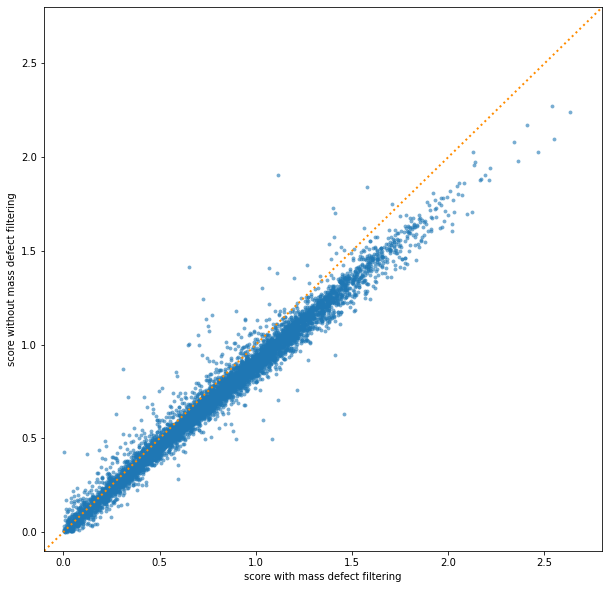

In [29]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('percolator score of identified features with and without mass defect window filtering')

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=15, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.1,2.8))
plt.ylim((-0.1,2.8))

plt.xlabel('score with mass defect filtering')
plt.ylabel('score without mass defect filtering')

plt.show()

##### show percentage improvement for each identification in common

In [20]:
combined_df['score_improvement'] = (combined_df.score_with_fmdw - combined_df.score_without_fmdw) / combined_df.score_without_fmdw * 100.0

In [21]:
average_improvement = combined_df.score_improvement.mean()
print('average improvement in score is {:.2f}%'.format(average_improvement))

average improvement in score is 11.16%


In [22]:
df = combined_df[abs(combined_df.score_improvement) <= 100]

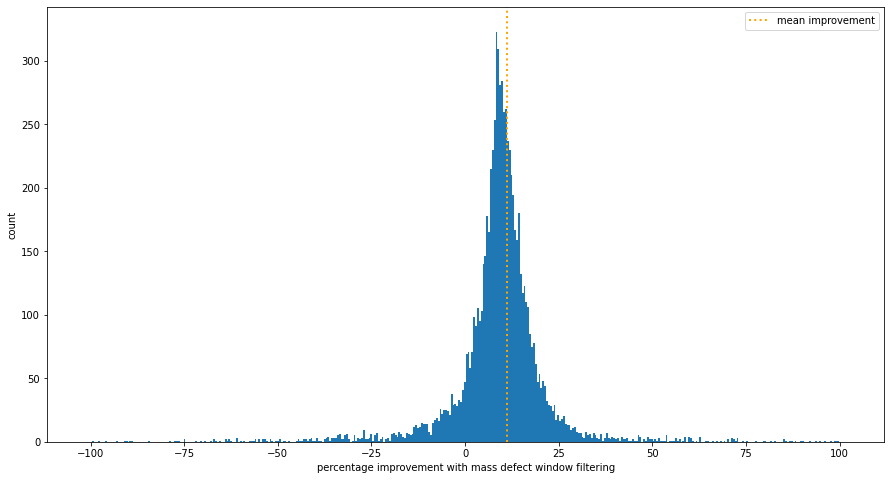

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('distribution of percentage improvement in percolator score with mass defect window filtering')

bins = 400
hist, bins, _ = plt.hist(df.score_improvement, bins=bins)
plt.xlabel('percentage improvement with mass defect window filtering')
plt.ylabel('count')

# plt.xlim((-50,50))
# plt.ylim((0,300))

plt.axvline(x=average_improvement, linestyle=':', linewidth=2, color='orange', label='mean improvement')

plt.legend()
plt.show()

#### compare identification q-value with and without

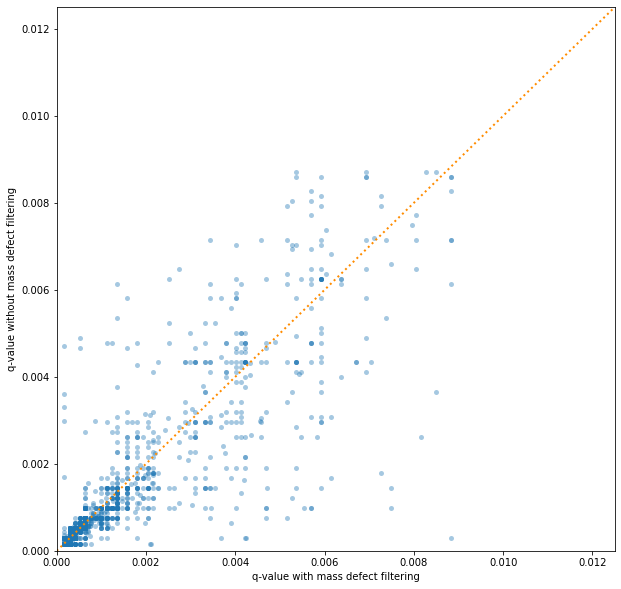

In [24]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((0,0.0125))
plt.ylim((0,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()

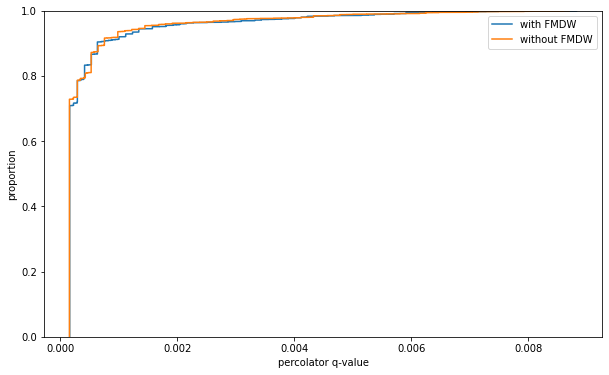

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# title = 'ECDF of Percolator q-value'
# plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="q_value_with_fmdw", label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="q_value_without_fmdw", label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator q-value', ylabel='proportion')

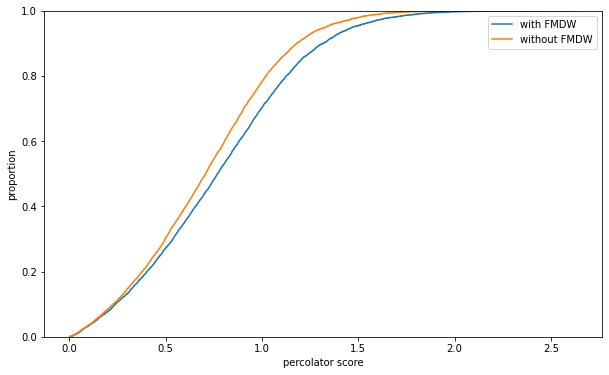

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# title = 'ECDF of Percolator score'
# plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="score_with_fmdw", legend=True, label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="score_without_fmdw", legend=True, label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator score', ylabel='proportion')

/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


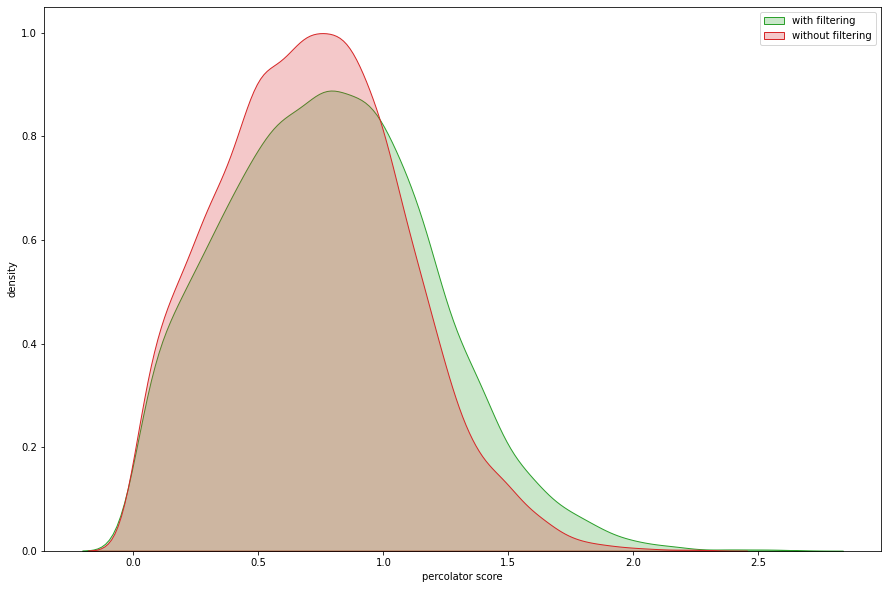

In [27]:
import seaborn as sns
plt.figure(figsize=(15, 10))

# title = 'density of the percolator score of identified features with and without mass defect window filtering'
# plt.title(title)

# plt.xlim((-4,4))
# plt.ylim((0,1))

ax = sns.distplot(combined_df.score_with_fmdw, hist = False, color='tab:green', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'with filtering')
_ = sns.distplot(combined_df.score_without_fmdw, hist = False, color='tab:red', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'without filtering')

_ = ax.set(xlabel='percolator score', ylabel='density')
_ = ax.legend()